# Analysis for the Paper on Fast Concept Mapping
*Written by Viviane Clay*

### Import Dependencies

In [120]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
from RL_utils import *
import matplotlib as mpl
from sklearn.manifold import TSNE

In [2]:
# adapt paths as nescessary
figurePath = './Results/TowerTraining/Figures/AgentRewardComparisonsAdaTH/ActivationPatternsNormx2No-01-FlatC-50-50Test/'
saveFigs = True
figureFormat = '.png'#'.eps'
dpi = 100 #300 for production
all_colors = ['lime','royalblue','darkred','grey','purple']
all_conditions = ['Agent', 'Autoencoder','Classifier','Random','Classifier Out']

### Load Data
These statistics are calculated in the script 'CalculteFCMStatistics.ipynb'

In [3]:
# statistics of the 3 reward type agents
bestTHStatsA = pd.read_csv(figurePath + 'bestTHStatsAgentsNormx2_TH2050.csv')
# statistics of agent, autoencoder, classifier and random (for TH 0.2 and 0.5)
bestTHStatsAECR_TH2050 = pd.read_csv(figurePath + 'bestTHStatsAECRNormx2_TH2050.csv')
bestTHStatsAECR_TH20 = bestTHStatsAECR_TH2050[bestTHStatsAECR_TH2050['TH']==0.2]
bestTHStatsAECR_TH50 = bestTHStatsAECR_TH2050[bestTHStatsAECR_TH2050['TH']==0.5]
# statistics for pattern complexity on all four conditions
bestTHStatsAECR_PCComp_AllC = pd.read_csv(figurePath + 'bestTHStatsAECR_PCComp_AllC.csv')
bestTHStatsAECR_PCComp = bestTHStatsAECR_PCComp_AllC[bestTHStatsAECR_PCComp_AllC['Concept']=='Level Door']
# statistics for number of examples on all four conditions
bestTHStatsAECR_numExp = pd.read_csv(figurePath + 'bestTHStatsAECR_numExpLDoor_TH20.csv')
# statistics for threshold on all four conditions
bestTHStatsAECR_TH = pd.read_csv(figurePath + 'bestTHStatsAECRNormx2_TH.csv')
bestTHStatsAECR_TH['F1Score'] = 2 * bestTHStatsAECR_TH['Precision'] * bestTHStatsAECR_TH['Recall'] / (bestTHStatsAECR_TH['Precision'] + bestTHStatsAECR_TH['Recall'])
# statistics for type of pattern (single, double, triplet) on the agent
bestTHStatsA_P = pd.read_csv(figurePath+'bestTHStatsA_Pattern.csv')
# statistics comparing support vector machine to FCM for agent
bestTHStatsA_SVM = pd.read_csv(figurePath+'bestTHStatsA_SVM.csv')
# performance of the classifier read out layer
classifier_stats = np.load(figurePath+'classifier_stats.npy',allow_pickle='TRUE').item()
#remove 'no door' concept for this analysis
bestTHStatsAECR_TH = bestTHStatsAECR_TH[bestTHStatsAECR_TH['Concept']!='No Door']
bestTHStatsAECR_PCComp_AllC = bestTHStatsAECR_PCComp_AllC[bestTHStatsAECR_PCComp_AllC['Concept']!='No Door']
bestTHStatsAECR_TH20WoND = bestTHStatsAECR_TH20[bestTHStatsAECR_TH20['Concept']!='No Door']

## Plot Statistics
### Threshold Comparison

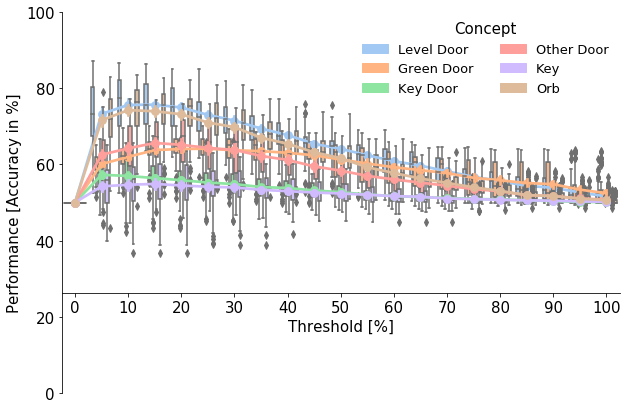

In [6]:
to_learn = ['Level Door', 'Green Door', 'Key Door', 'Other Door', 'Key', 'Orb']
palette = sns.color_palette("pastel", n_colors=7)
colors = palette#[palette[4],'skyblue']
data = bestTHStatsAECR_TH[bestTHStatsAECR_TH['Encoding']=='Agent']
plt.figure(figsize=(10,7))
ax1 = sns.boxplot(data=data,x='TH',y='Accuracy',hue='Concept',palette=colors)
ax2 = sns.pointplot(data=data,x='TH',y='Accuracy',hue='Concept',palette=colors)

plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -100))

plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)

legend_labels = to_learn
values = np.linspace(1,6,6)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches,bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0. , title='Concept',
           title_fontsize=15,fontsize=13,frameon=False,ncol=2)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_IntAgent_TH_Acc' + figureFormat, bbox_inches='tight', dpi=dpi)

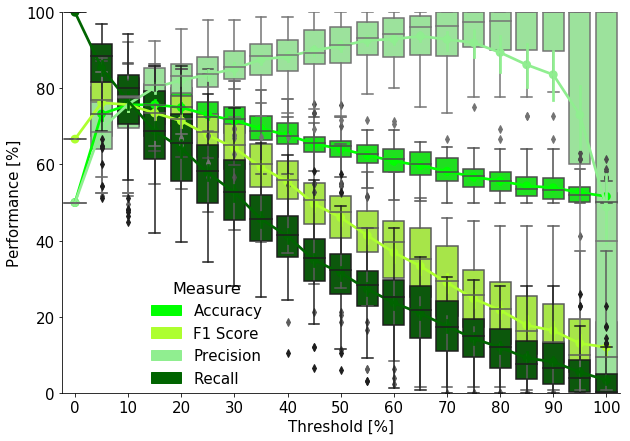

In [7]:
palette = sns.color_palette("Accent", n_colors=8)
colors = ['lime','greenyellow','lightgreen','darkgreen']
plt.figure(figsize=(10,7))
dataA = bestTHStatsAECR_TH[bestTHStatsAECR_TH['Encoding']=='Agent']
data = dataA[dataA['Concept']=='Level Door']
ax1 = sns.boxplot(data=data,x='TH',y='Accuracy',color=colors[0])
ax2 = sns.pointplot(data=data,x='TH',y='Accuracy',color=colors[0])
ax3 = sns.boxplot(data=data,x='TH',y='F1Score',color=colors[1])
ax4 = sns.pointplot(data=data,x='TH',y='F1Score',color=colors[1])
ax5 = sns.boxplot(data=data,x='TH',y='Precision',color=colors[2])
ax6 = sns.pointplot(data=data,x='TH',y='Precision',color=colors[2])
ax7 = sns.boxplot(data=data,x='TH',y='Recall',color=colors[3])
ax8 = sns.pointplot(data=data,x='TH',y='Recall',color=colors[3])

plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [%]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)

legend_labels = ['Accuracy', 'F1 Score','Precision','Recall']
values = np.linspace(1,4,4)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.15, 0.31), loc=2, borderaxespad=0. , title='Measure',
           title_fontsize=16,fontsize=15,frameon=False)

plt.show() if not saveFigs else plt.savefig(figurePath+'AgentTH_LD' + figureFormat, bbox_inches='tight', dpi=dpi)

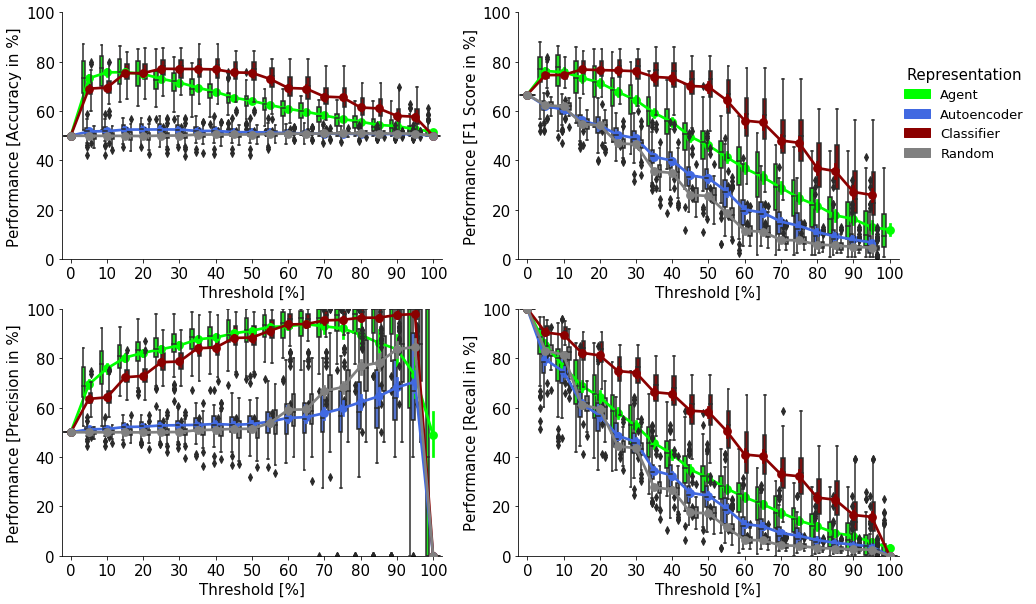

In [33]:
palette = sns.color_palette("Accent", n_colors=8)
colors = [all_colors[0],all_colors[1],all_colors[2],all_colors[3]]
data = bestTHStatsAECR_TH[bestTHStatsAECR_TH['Concept']=='Level Door']

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax1 = sns.boxplot(data=data,x='TH',y='Accuracy',hue='Encoding',palette=colors)
ax2 = sns.pointplot(data=data,x='TH',y='Accuracy',hue='Encoding',palette=colors)
plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)
ax1.get_legend().remove()

plt.subplot(2,2,2)
ax3 = sns.boxplot(data=data,x='TH',y='F1Score',hue='Encoding',palette=colors)
ax4 = sns.pointplot(data=data,x='TH',y='F1Score',hue='Encoding',palette=colors)
plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [F1 Score in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)
legend_labels = ['Agent', 'Autoencoder','Classifier','Random']
values = np.linspace(1,4,4)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0. , title='Representation',
           title_fontsize=15,fontsize=13,frameon=False)

plt.subplot(2,2,3)
ax5 = sns.boxplot(data=data,x='TH',y='Precision',hue='Encoding',palette=colors)
ax6 = sns.pointplot(data=data,x='TH',y='Precision',hue='Encoding',palette=colors)
plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [Precision in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)
ax5.get_legend().remove()

plt.subplot(2,2,4)
ax7 = sns.boxplot(data=data,x='TH',y='Recall',hue='Encoding',palette=colors)
ax8 = sns.pointplot(data=data,x='TH',y='Recall',hue='Encoding',palette=colors)
plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [Recall in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)
ax7.get_legend().remove()

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_AECR_TH_Door_PC10' + figureFormat, bbox_inches='tight', dpi=dpi)

### Number of Examples

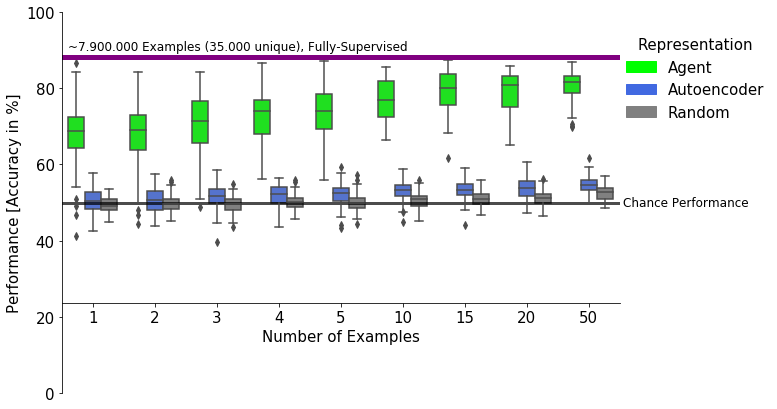

In [21]:
palette = sns.color_palette("Accent", n_colors=8)
part_colors = [all_colors[0],all_colors[1],all_colors[3],all_colors[4]]

plt.figure(figsize=(10,7))
plt.plot([-0.5,8.5],[50, 50],color='black',lw=3,alpha=0.7)
plt.text(8.55,49,'Chance Performance',fontsize=12)

data = bestTHStatsAECR_numExp[bestTHStatsAECR_numExp['Encoding']!='Classifier']
ax1 = sns.boxplot(data=data,x='NumExp',y='Accuracy',hue='Encoding',palette=part_colors)

plt.plot([-0.5,8.5],[classifier_stats['Accuracies'][1], classifier_stats['Accuracies'][1]],
         color=all_colors[-1],lw=5)
plt.text(-0.4,90,'~7.900.000 Examples (35.000 unique), Fully-Supervised',fontsize=12)


plt.xlabel('Number of Examples',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -90))

plt.xticks(fontsize=15)
legend_labels = ['Agent', 'Autoencoder','Random']
values = np.linspace(1,3,3)
patches = [ mpatches.Patch(color=part_colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.0, 0.95), loc=2, borderaxespad=0. , title='Representation',
           title_fontsize=15,fontsize=15,ncol=1,frameon=False)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_AECR_numExp_Acc20_CLine' + figureFormat, bbox_inches='tight', dpi=dpi)

In [14]:
data = bestTHStatsAECR_numExp[bestTHStatsAECR_numExp['Encoding']=='Agent']
print('ANOVA:  (Accuracy):')
mod = ols('Accuracy ~ NumExp',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print("All Concepts: \n" + str(aov_table) + '\n') 

data = data[data['NumExp']>15]
print('ANOVA:  (Accuracy):')
mod = ols('Accuracy ~ NumExp',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print("All Concepts: \n" + str(aov_table) + '\n') 

ANOVA:  (Accuracy):
All Concepts: 
                sum_sq     df           F        PR(>F)
NumExp    11716.018035    1.0  231.907391  9.376308e-47
Residual  45367.179254  898.0         NaN           NaN

ANOVA:  (Accuracy):
All Concepts: 
             sum_sq     df         F   PR(>F)
NumExp     184.3200    1.0  8.486099  0.00399
Residual  4300.6048  198.0       NaN      NaN



### Accuracy on Concepts

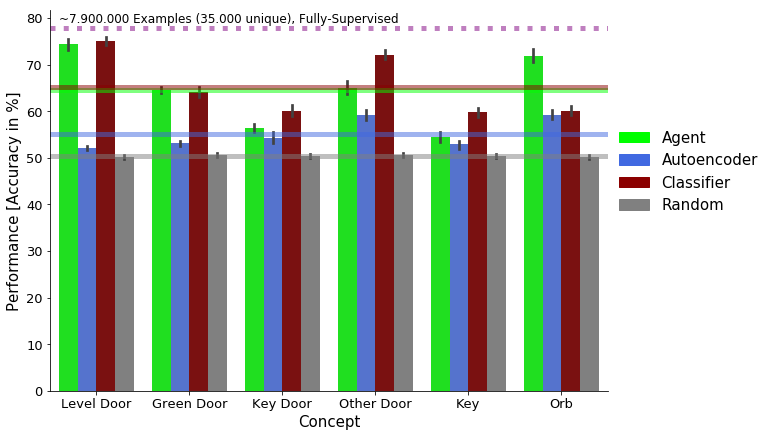

In [5]:
palette = sns.color_palette("Accent", n_colors=8)
colors = [palette[4],palette[7],palette[5],'purple',palette[3]]
colorsbar = all_colors[:-1]

plt.figure(figsize=(10,7))

ax1 = sns.barplot(data=bestTHStatsAECR_TH20WoND,x='Concept',y='Accuracy',hue='Encoding',palette=colorsbar)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xlabel('Concept',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([-0.5,5.5])
legend_labels = ['Agent', 'Autoencoder','Classifier','Random']
values = np.linspace(1,4,4)
patches = [ mpatches.Patch(color=all_colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0. ,
           title_fontsize=15,fontsize=15,frameon=False,ncol=1)

randMean = np.mean(bestTHStatsAECR_TH20WoND[bestTHStatsAECR_TH20WoND['Encoding']=='Random']['Accuracy'])
plt.plot([-0.5,7],[randMean, randMean],color=all_colors[3],lw=5,alpha=0.5)

AEMean = np.mean(bestTHStatsAECR_TH20WoND[bestTHStatsAECR_TH20WoND['Encoding']=='Autoencoder']['Accuracy'])
plt.plot([-0.5,7],[AEMean, AEMean],color=all_colors[1],lw=5,alpha=0.5)

AgentMean = np.mean(bestTHStatsAECR_TH20WoND[bestTHStatsAECR_TH20WoND['Encoding']=='Agent']['Accuracy'])
plt.plot([-0.5,7],[AgentMean, AgentMean],color=all_colors[0],lw=5,alpha=0.5)

ClassifierMean = np.mean(bestTHStatsAECR_TH20WoND[bestTHStatsAECR_TH20WoND['Encoding']=='Classifier']['Accuracy'])
plt.plot([-0.5,7],[ClassifierMean, ClassifierMean],color=all_colors[2],lw=5,alpha=0.5)

ClassOutMean = np.mean(classifier_stats['Accuracies'][1:])#exclude no door concept
plt.plot([-0.5,7],[ClassOutMean, ClassOutMean],color='purple',lw=5,alpha=0.5,ls=':')

plt.text(-0.4,79,'~7.900.000 Examples (35.000 unique), Fully-Supervised',fontsize=12)


plt.show() if not saveFigs else plt.savefig(figurePath+'AVG_AccC_AECR_TH20_WoND' + figureFormat, bbox_inches='tight', dpi=dpi)

### Pattern Complexity

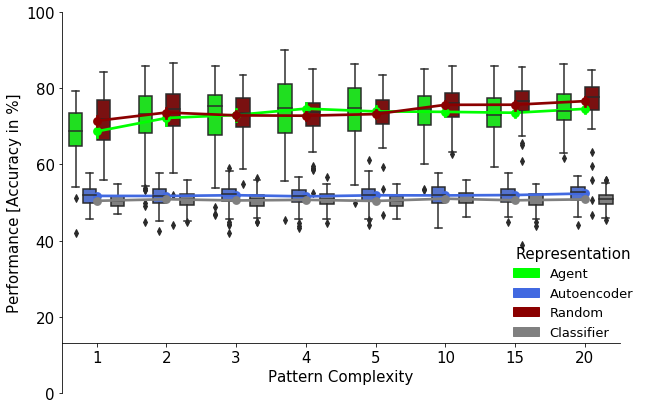

In [4]:
palette = sns.color_palette("Accent", n_colors=8)
colors = all_colors[:-1]
plt.figure(figsize=(10,7))
reorderedP = [colors[0],colors[1],colors[2],colors[3]]
ax1 = sns.boxplot(data=bestTHStatsAECR_PCComp,x='PC',y='Accuracy',hue='Encoding',palette=reorderedP)
ax2 = sns.pointplot(data=bestTHStatsAECR_PCComp,x='PC',y='Accuracy',hue='Encoding',palette=reorderedP)

plt.xlabel('Pattern Complexity',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -50))

legend_labels = ['Agent','Autoencoder','Random','Classifier']
values = np.linspace(1,4,4)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.8, 0.4), loc=2, borderaxespad=0. , title='Representation',
           title_fontsize=15,fontsize=13,frameon=False)
plt.xticks(fontsize=15)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_AECR_PC_Acc20' + figureFormat, bbox_inches='tight', dpi=dpi)

In [15]:
data = bestTHStatsAECR_PCComp[bestTHStatsAECR_PCComp['Encoding']=='Agent']
print('ANOVA:  (Accuracy):')
mod = ols('Accuracy ~ PC',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print("All Concepts: \n" + str(aov_table) + '\n') 

data = data[data['PC']>1]
print('ANOVA:  (Accuracy):')
mod = ols('Accuracy ~ PC',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print("All Concepts: \n" + str(aov_table) + '\n') 

ANOVA:  (Accuracy):
All Concepts: 
                sum_sq     df          F    PR(>F)
PC          782.874419    1.0  14.176231  0.000179
Residual  44069.102381  798.0        NaN       NaN

ANOVA:  (Accuracy):
All Concepts: 
                sum_sq     df         F    PR(>F)
PC          118.082727    1.0  2.180892  0.140184
Residual  37792.677216  698.0       NaN       NaN



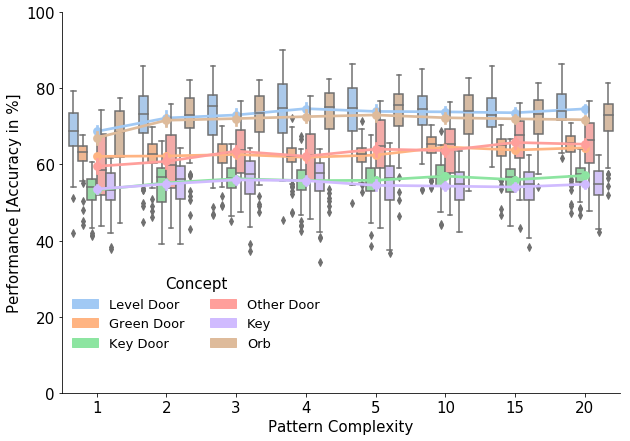

In [35]:
palette = sns.color_palette("pastel", n_colors=7)
colors = palette#[palette[4],'skyblue']
data = bestTHStatsAECR_PCComp_AllC[bestTHStatsAECR_PCComp_AllC['Encoding']=='Agent']
plt.figure(figsize=(10,7))
ax1 = sns.boxplot(data=data,x='PC',y='Accuracy',hue='Concept',palette=colors)
ax2 = sns.pointplot(data=data,x='PC',y='Accuracy',hue='Concept',palette=colors)

plt.xlabel('Pattern Complexity',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.xticks(fontsize=15)

legend_labels = to_learn
values = np.linspace(1,6,6)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches,bbox_to_anchor=(0.01, 0.32), loc=2, borderaxespad=0. , title='Concept',
           title_fontsize=15,fontsize=13,frameon=False,ncol=2)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_IntAgent_PC_Acc' + figureFormat, bbox_inches='tight', dpi=dpi)

### Hyperparameter Comparison Overview

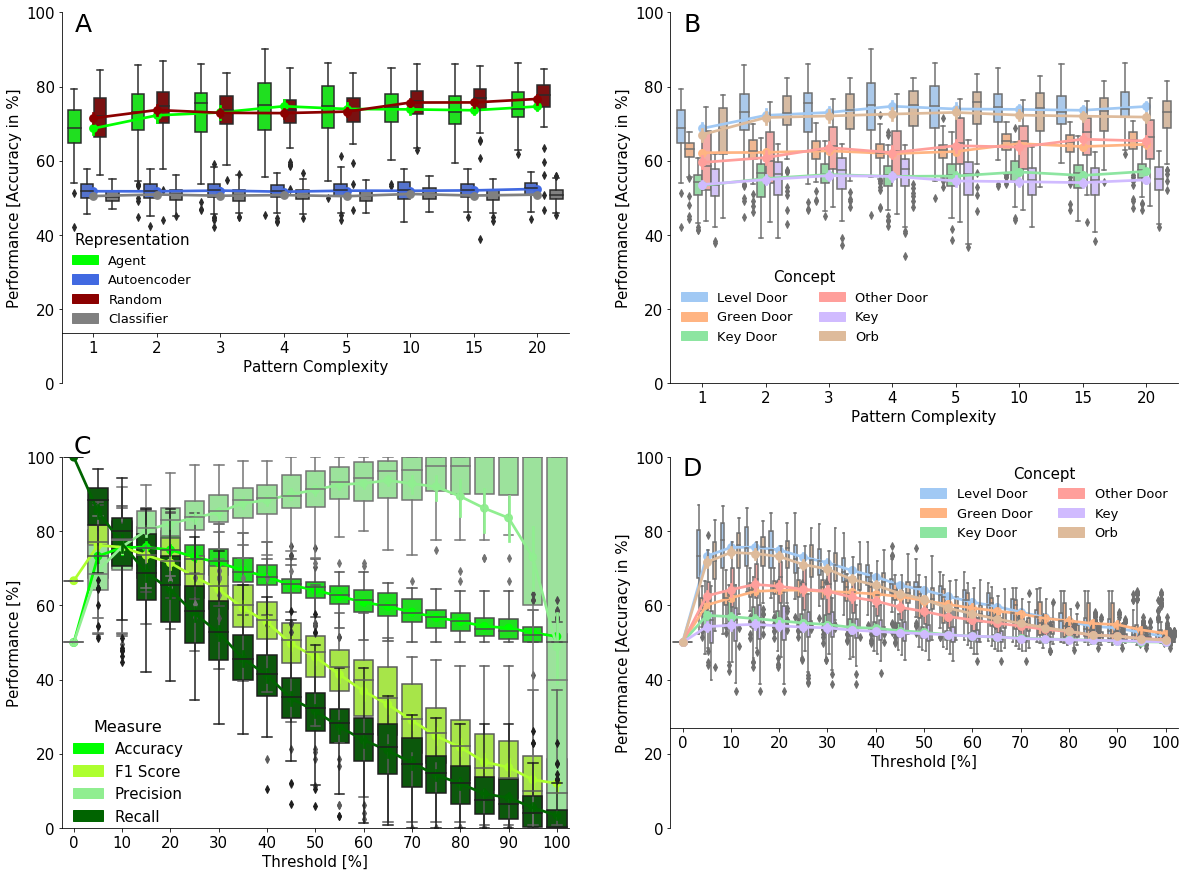

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.text(-0.3,95,'A',fontsize=25)
palette = sns.color_palette("Accent", n_colors=8)
colors = all_colors[:-1]
reorderedP = [colors[0],colors[1],colors[2],colors[3]]
ax1 = sns.boxplot(data=bestTHStatsAECR_PCComp,x='PC',y='Accuracy',hue='Encoding',palette=reorderedP)
ax2 = sns.pointplot(data=bestTHStatsAECR_PCComp,x='PC',y='Accuracy',hue='Encoding',palette=reorderedP)

plt.xlabel('Pattern Complexity',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -50))

legend_labels = ['Agent','Autoencoder','Random','Classifier']
values = np.linspace(1,4,4)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.01, 0.42), loc=2, borderaxespad=0. , title='Representation',
           title_fontsize=15,fontsize=13,frameon=False)
plt.xticks(fontsize=15)

plt.subplot(2,2,2)
plt.text(-0.3,95,'B',fontsize=25)
palette = sns.color_palette("pastel", n_colors=7)
colors = palette#[palette[4],'skyblue']
data = bestTHStatsAECR_PCComp_AllC[bestTHStatsAECR_PCComp_AllC['Encoding']=='Agent']
ax1 = sns.boxplot(data=data,x='PC',y='Accuracy',hue='Concept',palette=colors)
ax2 = sns.pointplot(data=data,x='PC',y='Accuracy',hue='Concept',palette=colors)

plt.xlabel('Pattern Complexity',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(fontsize=15)

legend_labels = to_learn
values = np.linspace(1,6,6)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches,bbox_to_anchor=(0.01, 0.32), loc=2, borderaxespad=0. , title='Concept',
           title_fontsize=15,fontsize=13,frameon=False,ncol=2)

plt.subplot(2,2,3)
plt.text(0,101,'C',fontsize=25)
palette = sns.color_palette("Accent", n_colors=8)
colors = ['lime','greenyellow','lightgreen','darkgreen']
dataA = bestTHStatsAECR_TH[bestTHStatsAECR_TH['Encoding']=='Agent']
data = dataA[dataA['Concept']=='Level Door']
ax1 = sns.boxplot(data=data,x='TH',y='Accuracy',color=colors[0])
ax2 = sns.pointplot(data=data,x='TH',y='Accuracy',color=colors[0])
ax3 = sns.boxplot(data=data,x='TH',y='F1Score',color=colors[1])
ax4 = sns.pointplot(data=data,x='TH',y='F1Score',color=colors[1])
ax5 = sns.boxplot(data=data,x='TH',y='Precision',color=colors[2])
ax6 = sns.pointplot(data=data,x='TH',y='Precision',color=colors[2])
ax7 = sns.boxplot(data=data,x='TH',y='Recall',color=colors[3])
ax8 = sns.pointplot(data=data,x='TH',y='Recall',color=colors[3])

plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [%]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)

legend_labels = ['Accuracy', 'F1 Score','Precision','Recall']
values = np.linspace(1,4,4)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.01, 0.31), loc=2, borderaxespad=0. , title='Measure',
           title_fontsize=16,fontsize=15,frameon=False)

plt.subplot(2,2,4)
plt.text(0,95,'D',fontsize=25)
palette = sns.color_palette("pastel", n_colors=7)
colors = palette#[palette[4],'skyblue']
data = bestTHStatsAECR_TH[bestTHStatsAECR_TH['Encoding']=='Agent']
ax1 = sns.boxplot(data=data,x='TH',y='Accuracy',hue='Concept',palette=colors)
ax2 = sns.pointplot(data=data,x='TH',y='Accuracy',hue='Concept',palette=colors)

plt.xlabel('Threshold [%]',fontsize=15)
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -100))
plt.xticks(np.linspace(0,20,11),np.linspace(0,100,11,dtype=int),fontsize=15)

legend_labels = to_learn
values = np.linspace(1,6,6)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches,bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0. , title='Concept',
           title_fontsize=15,fontsize=13,frameon=False,ncol=2)

plt.show() if not saveFigs else plt.savefig(figurePath+'HypParamFigure' + figureFormat, bbox_inches='tight', dpi=dpi)

### Reward Type

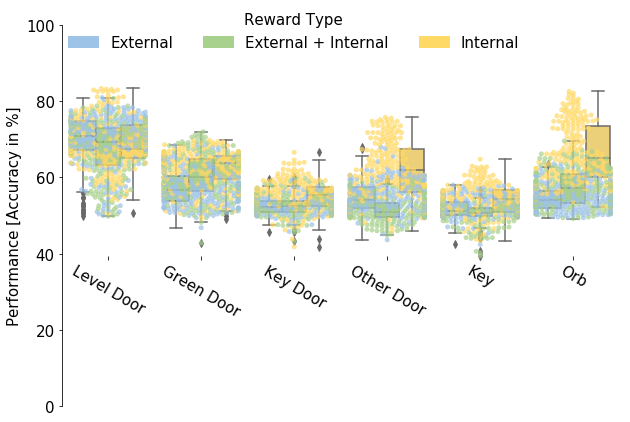

In [27]:
colors = colors = [np.array([157, 195, 230])/255,np.array([169, 209, 142])/255,np.array([255, 217, 102])/255]
plt.figure(figsize=(10,7))
ax1 = sns.boxplot(data=bestTHStatsA,x='Concept',y='Accuracy',hue='Encoding',palette=colors)
ax2 = sns.swarmplot(data=bestTHStatsA,x='Concept',y='Accuracy',hue='Encoding',palette=colors, alpha=0.7)

plt.xlabel('')
plt.ylabel('Performance [Accuracy in %]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -150))
ax1.spines['bottom'].set_visible(False)
plt.xticks(fontsize=15,rotation=-30)

legend_labels = ['External', 'External + Internal', 'Internal']
values = np.linspace(1,3,3)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.001, 1.05), loc=2, borderaxespad=0. , title='Reward Type',
           title_fontsize=15,fontsize=15,ncol=3,frameon=False)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_Agents_Acc' + figureFormat, bbox_inches='tight', dpi=dpi)

### Pattern Type

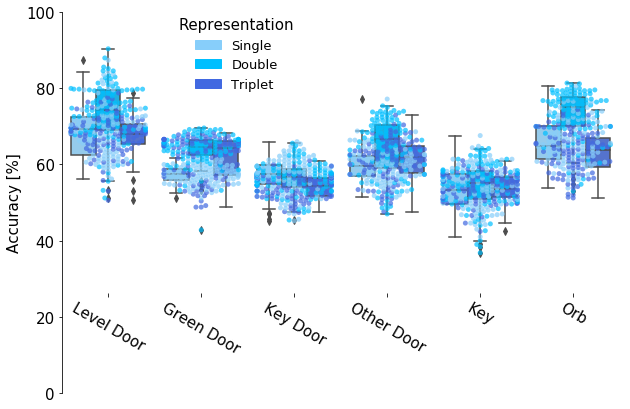

In [43]:
palette = sns.color_palette("Accent", n_colors=8)
colors = ['lightskyblue','deepskyblue','royalblue']
plt.figure(figsize=(10,7))
data = bestTHStatsA_P[bestTHStatsA_P['TH']==0.2]
ax1 = sns.boxplot(data=data,x='Concept',y='Accuracy',hue='Pattern',palette=colors)
ax2 = sns.swarmplot(data=data,x='Concept',y='Accuracy',hue='Pattern',palette=colors,alpha=0.7)

plt.xlabel('')
plt.ylabel('Accuracy [%]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -100))
ax1.spines['bottom'].set_visible(False)
plt.xticks(fontsize=15,rotation=-30)

legend_labels = ['Single','Double', 'Triplet']
values = np.linspace(1,3,3)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.2, 1.0), loc=2, borderaxespad=0. , title='Representation',
           title_fontsize=15,fontsize=13,frameon=False)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_AccTH02_Pattern' + figureFormat, bbox_inches='tight', dpi=dpi)

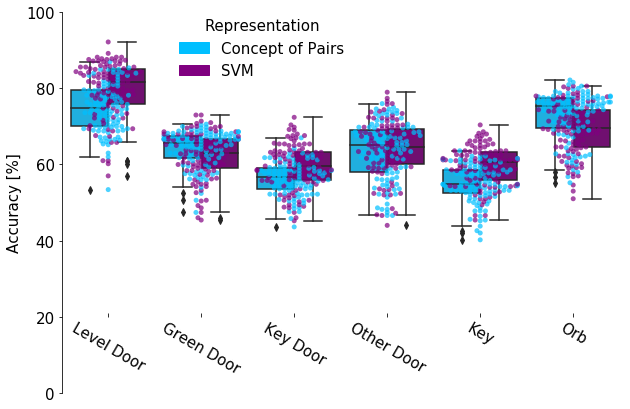

In [42]:
palette = sns.color_palette("Accent", n_colors=8)
colors = ['deepskyblue','purple']
plt.figure(figsize=(10,7))
data = bestTHStatsA_SVM[bestTHStatsA_SVM['TH']!=0.5]
ax1 = sns.boxplot(data=data,x='Concept',y='Accuracy',hue='Pattern',palette=colors)
ax2 = sns.swarmplot(data=data,x='Concept',y='Accuracy',hue='Pattern',palette=colors,alpha=0.7)

plt.xlabel('')
plt.ylabel('Accuracy [%]',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,100])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -80))
ax1.spines['bottom'].set_visible(False)
plt.xticks(fontsize=15,rotation=-30)

legend_labels = ['Concept of Pairs', 'SVM']
values = np.linspace(1,2,2)
patches = [ mpatches.Patch(color=colors[i], label=legend_labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.2, 1.0), loc=2, borderaxespad=0. , title='Representation',
           title_fontsize=15,fontsize=15,frameon=False)

plt.show() if not saveFigs else plt.savefig(figurePath+'Comp_AccTH02_SVM' + figureFormat, bbox_inches='tight', dpi=dpi)

## Network Activations

In [7]:
import networkx as nx
from itertools import combinations

In [3]:
path = './Results/TowerTraining/BalancedTestSet/'
encExt = np.load(path + 'encExt.npy')
encExtInt = np.load(path + 'encExtInt.npy')
encInt = np.load(path + 'encInt.npy')
encAE = np.load(path + 'encAE.npy')
encC = np.load(path + 'encC.npy')

In [5]:
encExtRaw = np.copy(encExt)
encIntRaw = np.copy(encInt)
encAERaw = np.copy(encAE)
encCRaw = np.copy(encC)

ActTHExt = np.mean(encExt, axis = 0)
ActTHInt = np.mean(encInt, axis = 0)
ActTHAE = np.mean(encAE, axis = 0)
ActTHC = np.mean(encC, axis = 0)

encExt = np.array(np.abs(encExt) > np.abs(ActTHExt),dtype=int)
encInt = np.array(np.abs(encInt) > np.abs(ActTHInt),dtype=int)
encAE = np.array(np.abs(encAE) > np.abs(ActTHAE),dtype=int)
encC = np.array(np.abs(encC) > np.abs(ActTHC),dtype=int)

encExtFixedTH = np.array((encExtRaw) > 0,dtype=int)
encIntFixedTH = np.array((encIntRaw) > 0,dtype=int)
encAEFixedTH = np.array((encAERaw) > 0,dtype=int)
encCFixedTH = np.array((encCRaw) > 0,dtype=int)

### Activation-Threshold Comparison, One Image

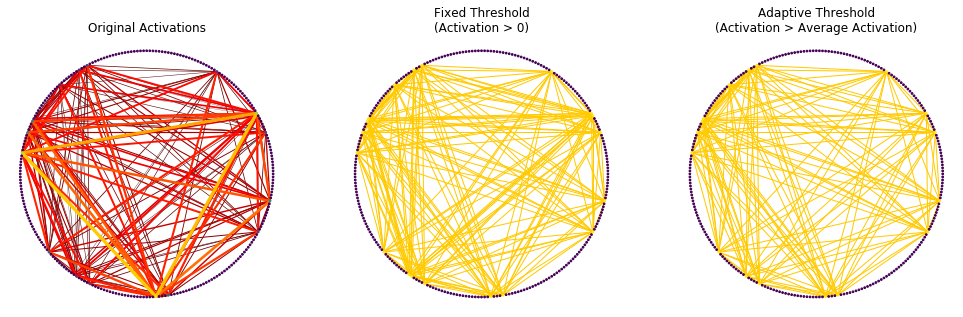

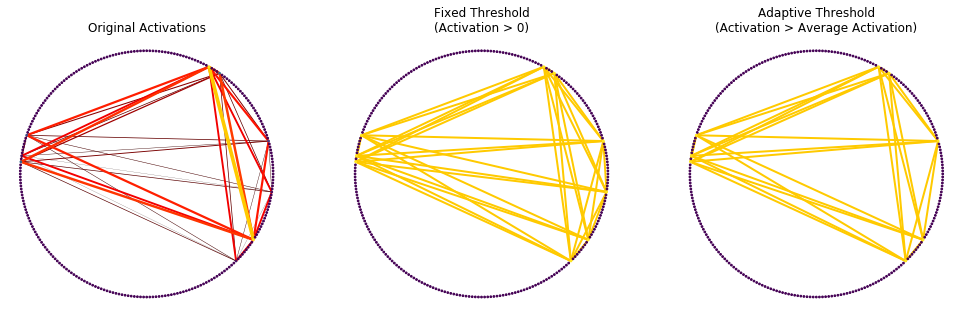

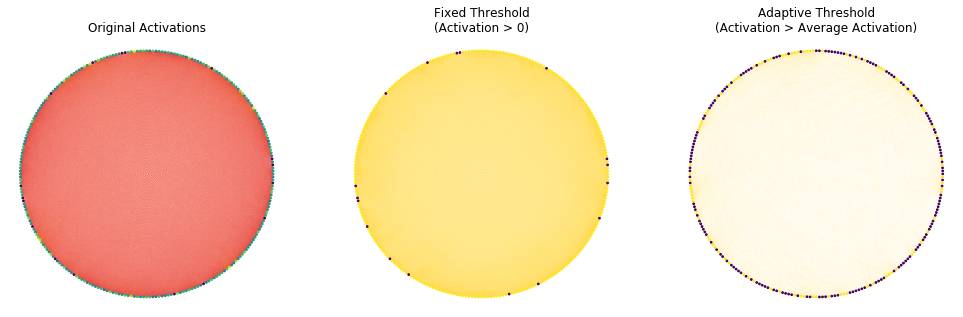

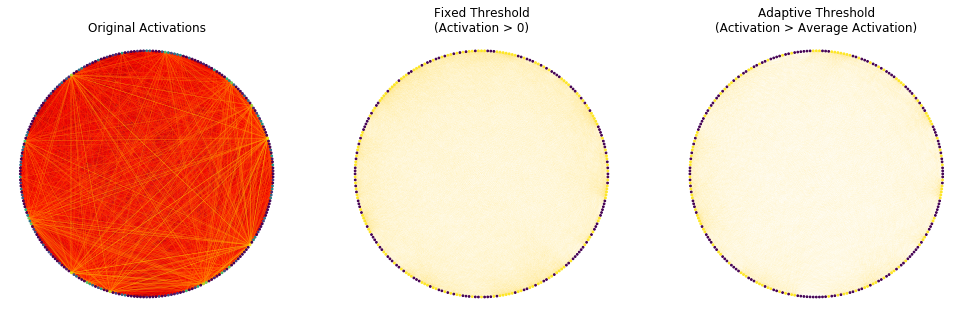

In [132]:
i=562#image is selected by having ~ the average amount of neurons active in agent (8)
conditions = ['Agent - External Rewards','Agent - Curious','AE','C']
encsRaw = [encExtRaw, encIntRaw,encAERaw,encCRaw]
encsFixed = [encExtFixedTH,encIntFixedTH,encAEFixedTH,encCFixedTH]
encsAda = [encExt,encInt,encAE,encC]
for cond in range(4):
    plt.figure(figsize=(17,5))
    plt.subplot(1,3,1)
    comb = combinations(np.linspace(0,255,256), 2)
    c = list(comb)
    edges = np.zeros(len(c))  
    for n in range(len(c)):
        a = int(c[n][0])
        b = int(c[n][1])
        if (encsRaw[cond][i][a]>0.01) & (encsRaw[cond][i][b]>0.01):
            if cond <= 1:
                edges[n] = (encsRaw[cond][i][a] + encsRaw[cond][i][b])/100
            else:
                edges[n] = (encsRaw[cond][i][a] + encsRaw[cond][i][b])/200
    G = nx.Graph()

    for e in range(len(c)):
        G.add_edge(str(int(c[e][0])),str(int(c[e][1])),weight=edges[e])
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color=encsRaw[cond][i],node_size=3)

    for weight in np.unique(edges):
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        ws = np.full(len(weighted_edges),weight/1.5)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=weight,edge_color=np.array(ws),
                                edge_cmap=plt.get_cmap(name='hot'), edge_vmin=0, edge_vmax=np.max(edges))    
    plt.title('Original Activations')
    plt.axis('off')

    plt.subplot(1,3,2)
    comb = combinations(np.linspace(0,255,256), 2)
    c = list(comb)
    edges = np.zeros(len(c))  
    for n in range(len(c)):
        a = int(c[n][0])
        b = int(c[n][1])
        if (encsFixed[cond][i][a]>0.5) & (encsFixed[cond][i][b]>0.5):
            if cond == 0:
                edges[n] = 1
            elif cond == 1:
                edges[n] = 2
            else:
                edges[n] = 0.01
    G = nx.Graph()

    for e in range(len(c)):
        G.add_edge(str(int(c[e][0])),str(int(c[e][1])),weight=edges[e])
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color=encsFixed[cond][i],node_size=3)

    for weight in np.unique(edges):
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        ws = np.full(len(weighted_edges),weight/1.5)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=weight,edge_color=np.array(ws),
                                edge_cmap=plt.get_cmap(name='hot'), edge_vmin=0, edge_vmax=np.max(edges))    
    plt.title('Fixed Threshold\n(Activation > 0)')
    plt.axis('off')

    plt.subplot(1,3,3)
    comb = combinations(np.linspace(0,255,256), 2)
    c = list(comb)
    edges = np.zeros(len(c))  
    for n in range(len(c)):
        a = int(c[n][0])
        b = int(c[n][1])
        if (encsAda[cond][i][a]>0.5) & (encsAda[cond][i][b]>0.5):
            if cond == 0:#change edge thickness for visibility
                edges[n] = 1
            elif cond == 1:
                edges[n] = 2
            else:
                edges[n] = 0.01
    G = nx.Graph()

    for e in range(len(c)):
        G.add_edge(str(int(c[e][0])),str(int(c[e][1])),weight=edges[e])
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color=encsAda[cond][i],node_size=3)

    for weight in np.unique(edges):
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        ws = np.full(len(weighted_edges),weight/1.5)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=weight,edge_color=np.array(ws),
                                edge_cmap=plt.get_cmap(name='hot'), edge_vmin=0, edge_vmax=np.max(edges))    
    plt.title('Adaptive Threshold\n(Activation > Average Activation)')
    plt.axis('off')
    plt.show() if not saveFigs else plt.savefig(figurePath+'THExpl9_FTH0_'+conditions[cond] + figureFormat, bbox_inches='tight', dpi=dpi)

### Activity Distribution

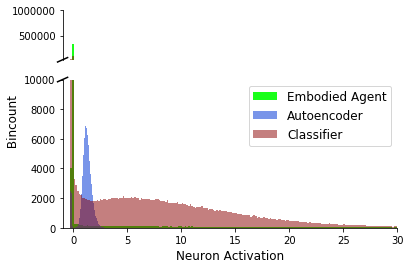

In [12]:
f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})#, sharex=True)

encFlat = encExtRaw.flatten()
encFlatAE = encAERaw.flatten()
encFlatC = encCRaw.flatten()
maxV = 30
ax.hist(encFlat[encFlat<maxV],bins=200,alpha=0.9,color=all_colors[0])
ax.hist(encFlatAE[encFlatAE<maxV],bins=200,alpha=0.7,color=all_colors[1])
ax.hist(encFlatC[encFlatC<maxV],bins=200,alpha=0.5,color=all_colors[2])

ax2.hist(encFlat[encFlat<maxV],bins=200,alpha=0.9,color=all_colors[0])
ax2.hist(encFlatAE[encFlatAE<maxV],bins=200,alpha=0.7,color=all_colors[1])
ax2.hist(encFlatC[encFlatC<maxV],bins=200,alpha=0.5,color=all_colors[2])

ax.set_xticks([], [])
ax2.set_ylim(0, 10000)
ax2.set_xlim(-1,30)
ax.set_ylim(20000, 1000000)
ax.set_xlim(-1,30)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.xlabel('Neuron Activation',fontsize=12)
plt.ylabel('                 Bincount',fontsize=12)

ax2.legend(['Embodied Agent','Autoencoder','Classifier'],fontsize=12)

d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d-0.03, +d+0.03), **kwargs)
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

plt.show()
#plt.savefig(figurePath+'ActDist.eps', bbox_inches='tight', dpi=300)

### Single Neuron Activations

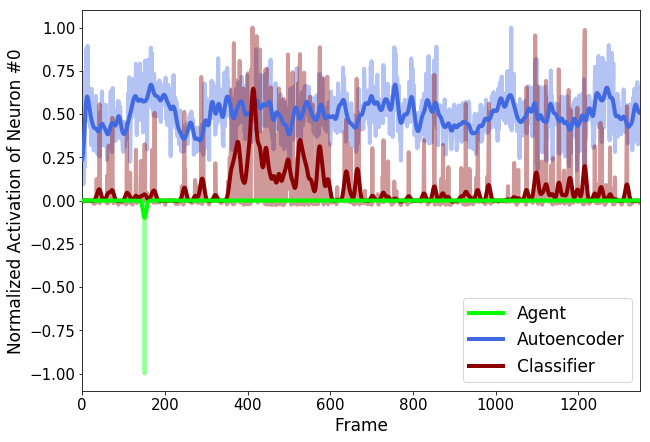

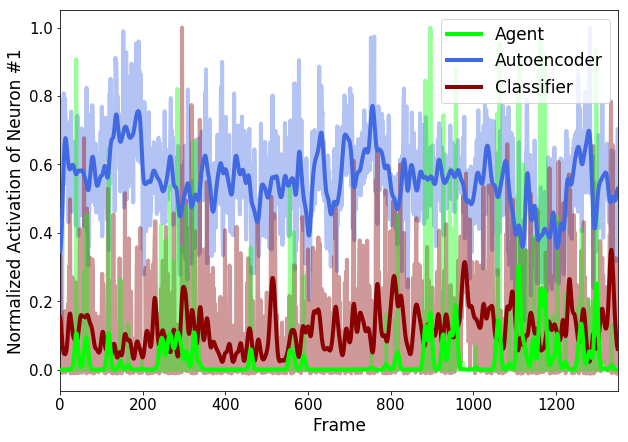

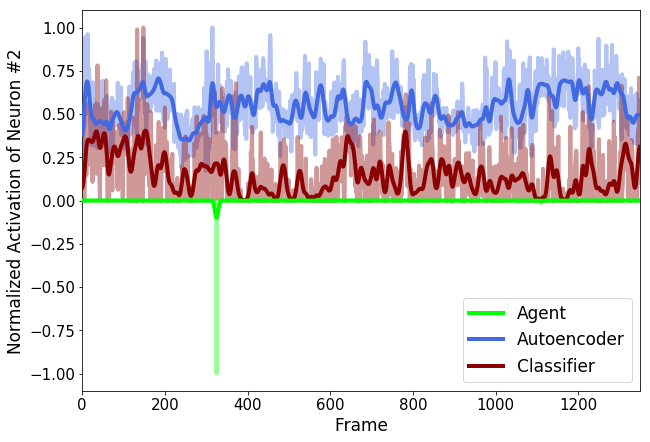

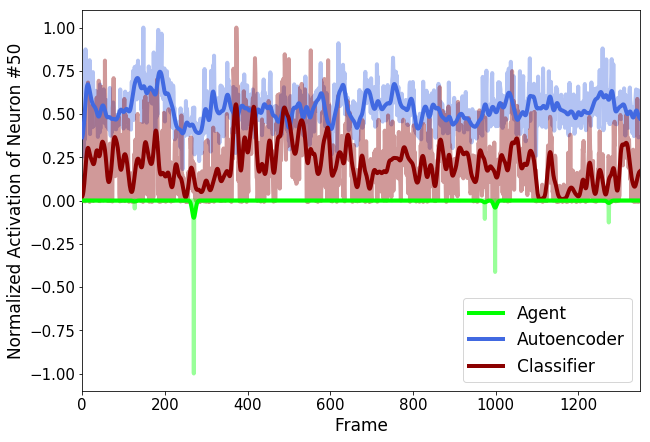

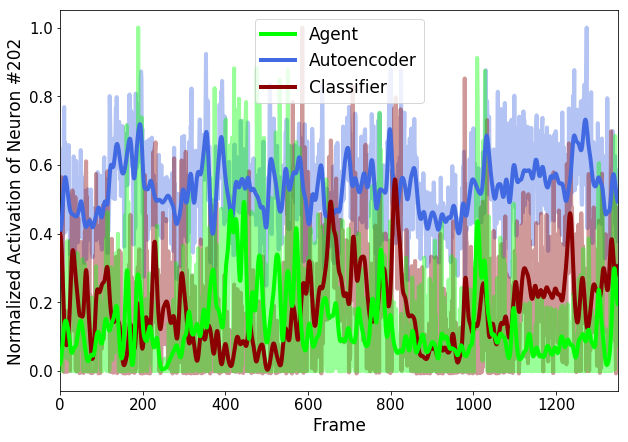

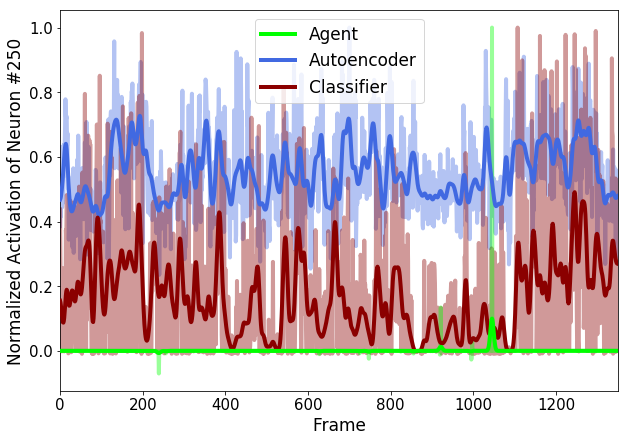

In [15]:
for n in [0,1,2,50,202,250]:
    plt.figure(figsize=(10,7))
    ysmoothedExt = gaussian_filter1d(encExtRaw[:,n]/np.max(np.abs(encExtRaw[:,n])), sigma=4)
    plt.plot(ysmoothedExt,color=all_colors[0],lw=4,zorder=6)

    ysmoothedAE = gaussian_filter1d(encAERaw[:,n]/np.max(np.abs(encAERaw[:,n])), sigma=4)
    plt.plot(ysmoothedAE,color=all_colors[1],lw=4,zorder=4)

    ysmoothedC = gaussian_filter1d(encCRaw[:,n]/np.max(np.abs(encCRaw[:,n])), sigma=4)
    plt.plot(ysmoothedC,color=all_colors[2],lw=4,zorder=4)

    plt.plot(encExtRaw[:,n]/np.max(np.abs(encExtRaw[:,n])),color=all_colors[0],lw=4,zorder=3,alpha=0.4)
    plt.plot(encAERaw[:,n]/np.max(np.abs(encAERaw[:,n])),color=all_colors[1],lw=4,alpha=0.4)
    plt.plot(encCRaw[:,n]/np.max(np.abs(encCRaw[:,n])),color=all_colors[2],lw=4,alpha=0.4)

    plt.xlim([0,1350])
    plt.legend(['Agent','Autoencoder','Classifier'],fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Frame',fontsize=17)
    plt.ylabel('Normalized Activation of Neuron #'+str(n),fontsize=17)
    plt.show()
    #plt.savefig(figurePath+'NeuronActs/ActN'+str(n)+'.jpeg', bbox_inches='tight', dpi=300)


### 3 Run Analysis (Sparsity and t-SNE)
This is done on 3 runs. The balanced test set doesn't include actions. As we don't have the corresponding vector observations these are difficult to extract exactly from the test set images.
#### Load 3 Run Data

In [114]:
dataPath = './Results/TowerTraining/Recordings/'

# Condition 1 - Standard PPO Agent, No Curiosity

c1Params = {'train':'Standard',
           'runNumber':'4000_12.800',
           'title':'External Rewards',
            'isCurious':False,
           'useCurEnc':False,
           'isPPO':True,
            'onlyVisual':True,
           'labelPath':'Sorted/labels.csv'}

# Condition 2 - Curious Agent With External Rewards

c2Params = {'train':'Curious',
           'runNumber':'4000_14.400',
           'title':'External + Internal Rewards',
            'isCurious':True,
           'useCurEnc':False,
           'isPPO':True,
            'onlyVisual':True,
           'labelPath':'Sorted/labels.csv'}


# Condition 3 - Curious Agent with No External Rewards

c3Params = {'train':'CuriousNoR',
           'runNumber':'2800_0',
           'title':'Internal Rewards',
            'isCurious':True,
           'useCurEnc':False,
           'isPPO':True,
            'onlyVisual':True,
           'labelPath':'Sorted/labels.csv'}

onlyVisual = True

In [115]:
c1Params['path'] = dataPath + c1Params['train'] + "/" + c1Params['runNumber'] + "/"
c2Params['path'] = dataPath + c2Params['train'] + "/" + c2Params['runNumber'] + "/"
c3Params['path'] = dataPath + c3Params['train'] + "/" + c3Params['runNumber'] + "/"

checkData = False #set to true to make sure new data is all correct (takes longer)

numActs = 5
c1Data, c2Data, c3Data = LoadData(c1Params, c2Params, c3Params, numActs)


conditions = [c1Data,c2Data,c3Data]
defaultActions = c1Data['act_combs']
defaultActLabels = c1Data['act_labels']

Loading Standard - C1O1 from ./Results/TowerTraining/Recordings/Standard/4000_12.800/4000_12.800_Same/
Loading Standard - C1O2 from ./Results/TowerTraining/Recordings/Curious/4000_14.400/4000_14.400_Standard/
Loading Standard - C1O3 from ./Results/TowerTraining/Recordings/CuriousNoR/2800_0/2800_0_Standard/
Loading Curious - C2O1 from ./Results/TowerTraining/Recordings/Standard/4000_12.800/4000_12.800_Curious/
Loading Curious - C2O2 from ./Results/TowerTraining/Recordings/Curious/4000_14.400/4000_14.400_Same/
Loading Curious - C2O3 from ./Results/TowerTraining/Recordings/CuriousNoR/2800_0/2800_0_Curious/
Loading CuriousNoR - C3O1 from ./Results/TowerTraining/Recordings/Standard/4000_12.800/4000_12.800_CuriousNoR/
Loading CuriousNoR - C3O2 from ./Results/TowerTraining/Recordings/Curious/4000_14.400/4000_14.400_CuriousNoR/
Loading CuriousNoR - C3O3 from ./Results/TowerTraining/Recordings/CuriousNoR/2800_0/2800_0_Same/
Observation Clip at: 2800
Condition Standard merged encodings of shapes

#### Apply Adaptive Threshold

In [95]:
c1ActTH = np.mean(c1Data["encodings"], axis = 0)
c2ActTH = np.mean(c2Data["encodings"], axis = 0)
c3ActTH = np.mean(c3Data["encodings"], axis = 0)

c1Data["encodings"] = np.array(np.abs(c1Data["encodings"]) > np.abs(c1ActTH),dtype=int)
c2Data["encodings"] = np.array(np.abs(c2Data["encodings"]) > np.abs(c2ActTH),dtype=int)
c3Data["encodings"] = np.array(np.abs(c3Data["encodings"]) > np.abs(c3ActTH),dtype=int)

#### Analyze Encoding Statistics

In [100]:
perAct1 = np.sum((c1Data["encodings"])>0,axis=0)/c1Data["encodings"].shape[0]
perAct2 = np.sum((c2Data["encodings"])>0,axis=0)/c2Data["encodings"].shape[0]
perAct3 = np.sum((c3Data["encodings"])>0,axis=0)/c3Data["encodings"].shape[0]
c1ActTH = 0#because the activations are already thresholded so they are only 0 or 1
c2ActTH = 0
c3ActTH = 0

if onlyVisual:
    print(c1Params['title'])
    c1NumN = c1Data["encodings"].shape[-1]
    c1NumT = c1Data["encodings"].shape[0]
    print("Average number of neurons active per frame (visual): "+str(np.round(np.mean(np.sum(c1Data["encodings"]>c1ActTH,axis=1)),2))+" (min="+str(np.min(np.sum(c1Data["encodings"]>c1ActTH,axis=1)))+
          " max="+str(np.max(np.sum(c1Data["encodings"]>c1ActTH,axis=1)))+" var="+str(np.round(np.var(np.sum(c1Data["encodings"]>c1ActTH,axis=1)),2))+")")
    print("This is "+str(np.round(np.mean(np.sum(c1Data["encodings"]>c1ActTH,axis=1))/c1NumN*100,2))+"% of all neurons.")
    print("In the visual encoding "+str(np.sum(perAct1>0))+" of the " + str(c1NumN) + " neurons are active in at least 1 frame (="+
    str(np.round(np.sum(perAct1>0)/c1NumN*100,2))+"%), "+str(np.sum(perAct1>0.4))+" neurons are active in more than 40% of the frames (="+
    str(np.round(np.sum(perAct1>0.4)/c1NumN*100,2))+"%). "+str(np.sum(perAct1==0))+" neurons are never active (="+str(np.round(np.sum(perAct1==0)/c1NumN*100,2))
          +"%). The most active neuron is active in "+str(np.round(np.max(perAct1)*100,2))+"% of the frames (=" + str(np.max(np.sum((c1Data["encodings"])>c1ActTH,axis=0))) + " Frames).")

    print("\n" + c2Params['title'])
    c2NumN = c2Data["encodings"].shape[-1]
    c2NumT = c2Data["encodings"].shape[0]
    print("Average number of neurons active per frame (visual): "+str(np.round(np.mean(np.sum(c2Data["encodings"]>c2ActTH,axis=1)),2))+" (min="+str(np.min(np.sum(c2Data["encodings"]>c2ActTH,axis=1)))+
      " max="+str(np.max(np.sum(c2Data["encodings"]>c2ActTH,axis=1)))+" var="+str(np.round(np.var(np.sum(c2Data["encodings"]>c2ActTH,axis=1)),2))+")")
    print("This is "+str(np.round(np.mean(np.sum(c2Data["encodings"]>c2ActTH,axis=1))/c2NumN*100,2))+"% of all neurons.")
    print("In the visual encoding "+str(np.sum(perAct2>0))+" of the " + str(c2NumN) + " neurons are active in at least 1 frame (="+
     str(np.round(np.sum(perAct2>0)/c2NumN*100,2))+"%), "+str(np.sum(perAct2>0.4))+" neurons are active in more than 40% of the frames (="+
     str(np.round(np.sum(perAct2>0.4)/c2NumN*100,2))+"%). "+str(np.sum(perAct2==0))+" neurons are never active (="+str(np.round(np.sum(perAct2==0)/c2NumN*100,2))+
     "%). The most active neuron is active in "+str(np.round(np.max(perAct2)*100,2))+"% of the frames(=" + str(np.max(np.sum((c2Data["encodings"])>c1ActTH,axis=0))) + " Frames).")

    print("\n" + c3Params['title'])
    c3NumN = c3Data["encodings"].shape[-1]
    c3NumT = c3Data["encodings"].shape[0]
    print("Average number of neurons active per frame (visual): "+str(np.round(np.mean(np.sum(c3Data["encodings"]>c3ActTH,axis=1)),2))+" (min="+str(np.min(np.sum(c3Data["encodings"]>c3ActTH,axis=1)))+
      " max="+str(np.max(np.sum(c3Data["encodings"]>c3ActTH,axis=1)))+" var="+str(np.round(np.var(np.sum(c3Data["encodings"]>c3ActTH,axis=1)),2))+")")
    print("This is "+str(np.round(np.mean(np.sum(c3Data["encodings"]>c3ActTH,axis=1))/c3NumN*100,2))+"% of all neurons.")
    print("In the visual encoding "+str(np.sum(perAct3>0))+" of the " + str(c3NumN) + " neurons are active in at least 1 frame (="+
     str(np.round(np.sum(perAct3>0)/c3NumN*100,2))+"%), "+str(np.sum(perAct3>0.4))+" neurons are active in more than 40% of the frames (="+
     str(np.round(np.sum(perAct3>0.4)/c3NumN*100,2))+"%). "+str(np.sum(perAct3==0))+" neurons are never active (="+str(np.round(np.sum(perAct3==0)/c3NumN*100,2))+
     "%). The most active neuron is active in "+str(np.round(np.max(perAct3)*100,2))+"% of the frames(=" + str(np.max(np.sum((c3Data["encodings"])>c1ActTH,axis=0))) + " Frames).")
else:
    print("Adjust code to get vector observation analysis additionally. (vecActPer = np.sum((c1Data['encodings'][:,256:])>0,axis=0)/c1Data['encodings'].shape[0]*100)")

External Rewards
Average number of neurons active per frame (visual): 12.99 (min=1 max=59 var=33.12)
This is 5.07% of all neurons.
In the visual encoding 256 of the 256 neurons are active in at least 1 frame (=100.0%), 0 neurons are active in more than 40% of the frames (=0.0%). 0 neurons are never active (=0.0%). The most active neuron is active in 37.92% of the frames (=3185 Frames).

External + Internal Rewards
Average number of neurons active per frame (visual): 9.88 (min=0 max=80 var=31.85)
This is 3.86% of all neurons.
In the visual encoding 256 of the 256 neurons are active in at least 1 frame (=100.0%), 1 neurons are active in more than 40% of the frames (=0.39%). 0 neurons are never active (=0.0%). The most active neuron is active in 44.68% of the frames(=3753 Frames).

Internal Rewards
Average number of neurons active per frame (visual): 8.05 (min=0 max=29 var=13.12)
This is 3.15% of all neurons.
In the visual encoding 233 of the 256 neurons are active in at least 1 frame (=9

#### t-SNE

In [101]:
tsne3 = TSNE(n_components=2,perplexity=70,random_state=0).fit_transform(c3Data["encodings"])

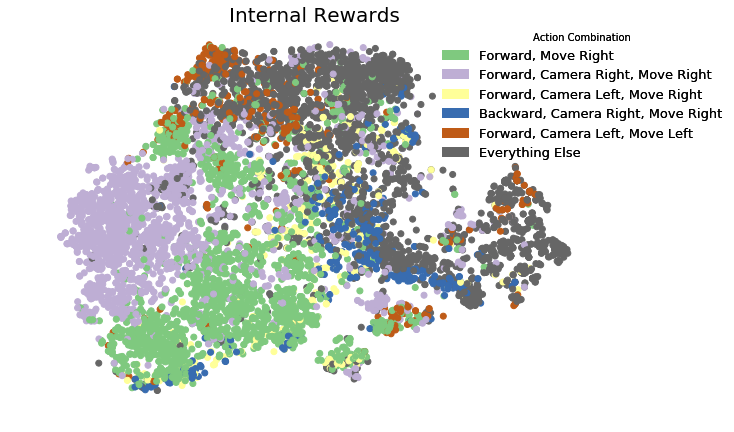

In [119]:
if 'labels' in c1Data.keys():
    fig = plt.figure(figsize=(10,7))
    plt.title(c3Params['title'], fontsize=20)
    whichActCombs3 = c3Data['act_combs']
    im1 = plt.scatter(tsne3[:,0],tsne3[:,1],c=whichActCombs3,cmap='Accent')#,edgecolors=edgeCs[newOrder],linewidths =edgeWs[newOrder])
    values = np.linspace(0,numActs,numActs+1)
    colors = [ im1.cmap(im1.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label=c1Data['act_labels'][i] ) for i in range(len(values)) ]
    l1 = plt.legend(handles=patches, bbox_to_anchor=(0.72, 1.0), loc=2, borderaxespad=0. , title='Action Combination',fontsize=13,frameon=False)
    fig.add_artist(l1)

    plt.axis('off')
    plt.show()# if not saveFigs else plt.savefig(figurePath+'tsne_actions_' + c3Params['title'].replace(' ','') + figureFormat, bbox_inches='tight', dpi=dpi)
    plt.close('all')
else:
    print("No labled frames provided. Please specify a file with lables at the begining of the script if you want a tsne figure colored by actions.")

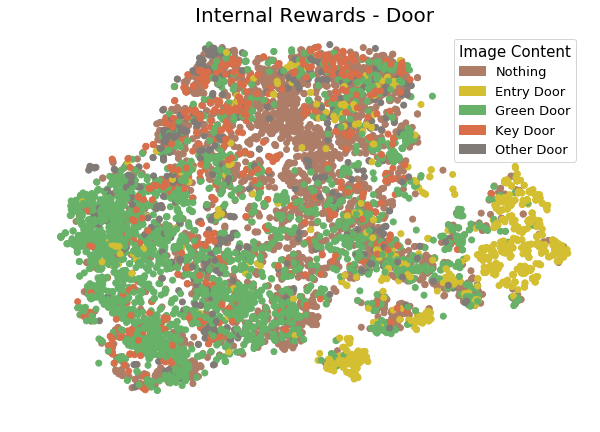

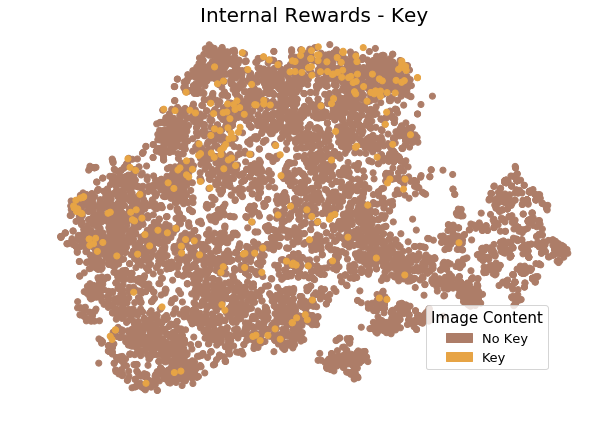

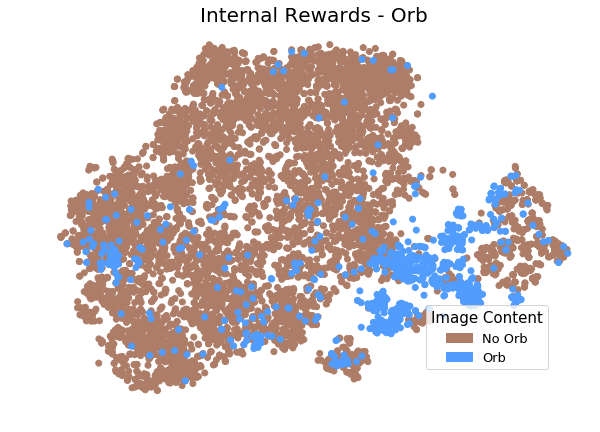

In [110]:
sem_label_names = [['Nothing','Entry Door','Green Door','Key Door','Other Door'],
                   ['No Key', 'Key'],
                   ['No Orb', 'Orb'],
                   ['No Puzzle', 'Puzzle']]
branches = ['Door','Key','Orb','Puzzle']

objectColors = [[np.array([173, 125, 104])/255,np.array([212, 190, 50])/255, np.array([103, 177, 105])/255,np.array([216, 111, 74])/255,np.array([129, 123, 119])/255],
             [np.array([173, 125, 104])/255,np.array([231, 164, 69])/255],
             [np.array([173, 125, 104])/255,np.array([81, 156, 255])/255],
             [np.array([173, 125, 104])/255,np.array([163, 118, 202])/255]]

if 'labels' in c1Data.keys():
    for i in range(3):# Right now no plottig of puzzle since there are no puzzle frames in the excerpt
        
        contentLabels1 = (c1Data['labels'][:,i]).astype(int)
        newOrder = np.append(np.where(contentLabels1==0),np.where(contentLabels1!=0))
        numClasses = len(sem_label_names[i])

        cmapnew = mpl.colors.ListedColormap(objectColors[i], name='Orbs')

        sem_lab = sem_label_names[i]

        plt.figure(figsize=(10,7))
        #plt.title('T-SNE on the Visual Embedding\nClassifier', fontsize=20)
        plt.title(c3Params['title'] + ' - ' + branches[i], fontsize=20)
        im1 = plt.scatter(tsne3[newOrder,0],tsne3[newOrder,1],c=contentLabels1[newOrder],cmap=cmapnew)
        values = np.linspace(0,numClasses-1,numClasses)
        colors = [ im1.cmap(im1.norm(value)) for value in values]
        patches = [ mpatches.Patch(color=colors[i], label=sem_lab[i] ) for i in range(len(values)) ]
        if i == 0:
            plt.legend(handles=patches, bbox_to_anchor=(0.75, 0.97), loc=2, borderaxespad=0. , title='Image Content',fontsize=13, title_fontsize=15)
        else:
            plt.legend(handles=patches, bbox_to_anchor=(0.7, 0.27), loc=2, borderaxespad=0. , title='Image Content',fontsize=13, title_fontsize=15)

        plt.axis('off')
        plt.show()# if not saveFigs else plt.savefig(figurePath+'tsne_semantic_'+c3Params['title'].replace(' ','') + '_' + branches[i] + figureFormat, bbox_inches='tight', dpi=dpi)
        plt.close()
else:
    print("No labled frames provided. Please specify a file with lables at the begining of the script if you want a tsne figure colored by content.")